## Import Library

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
data_path = os.path.join(os.getcwd(), "heart.csv")
data = pd.read_csv(data_path)
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


#### Variable Description

- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or - depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

## Data Understanding

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
data.duplicated().sum()

0

In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


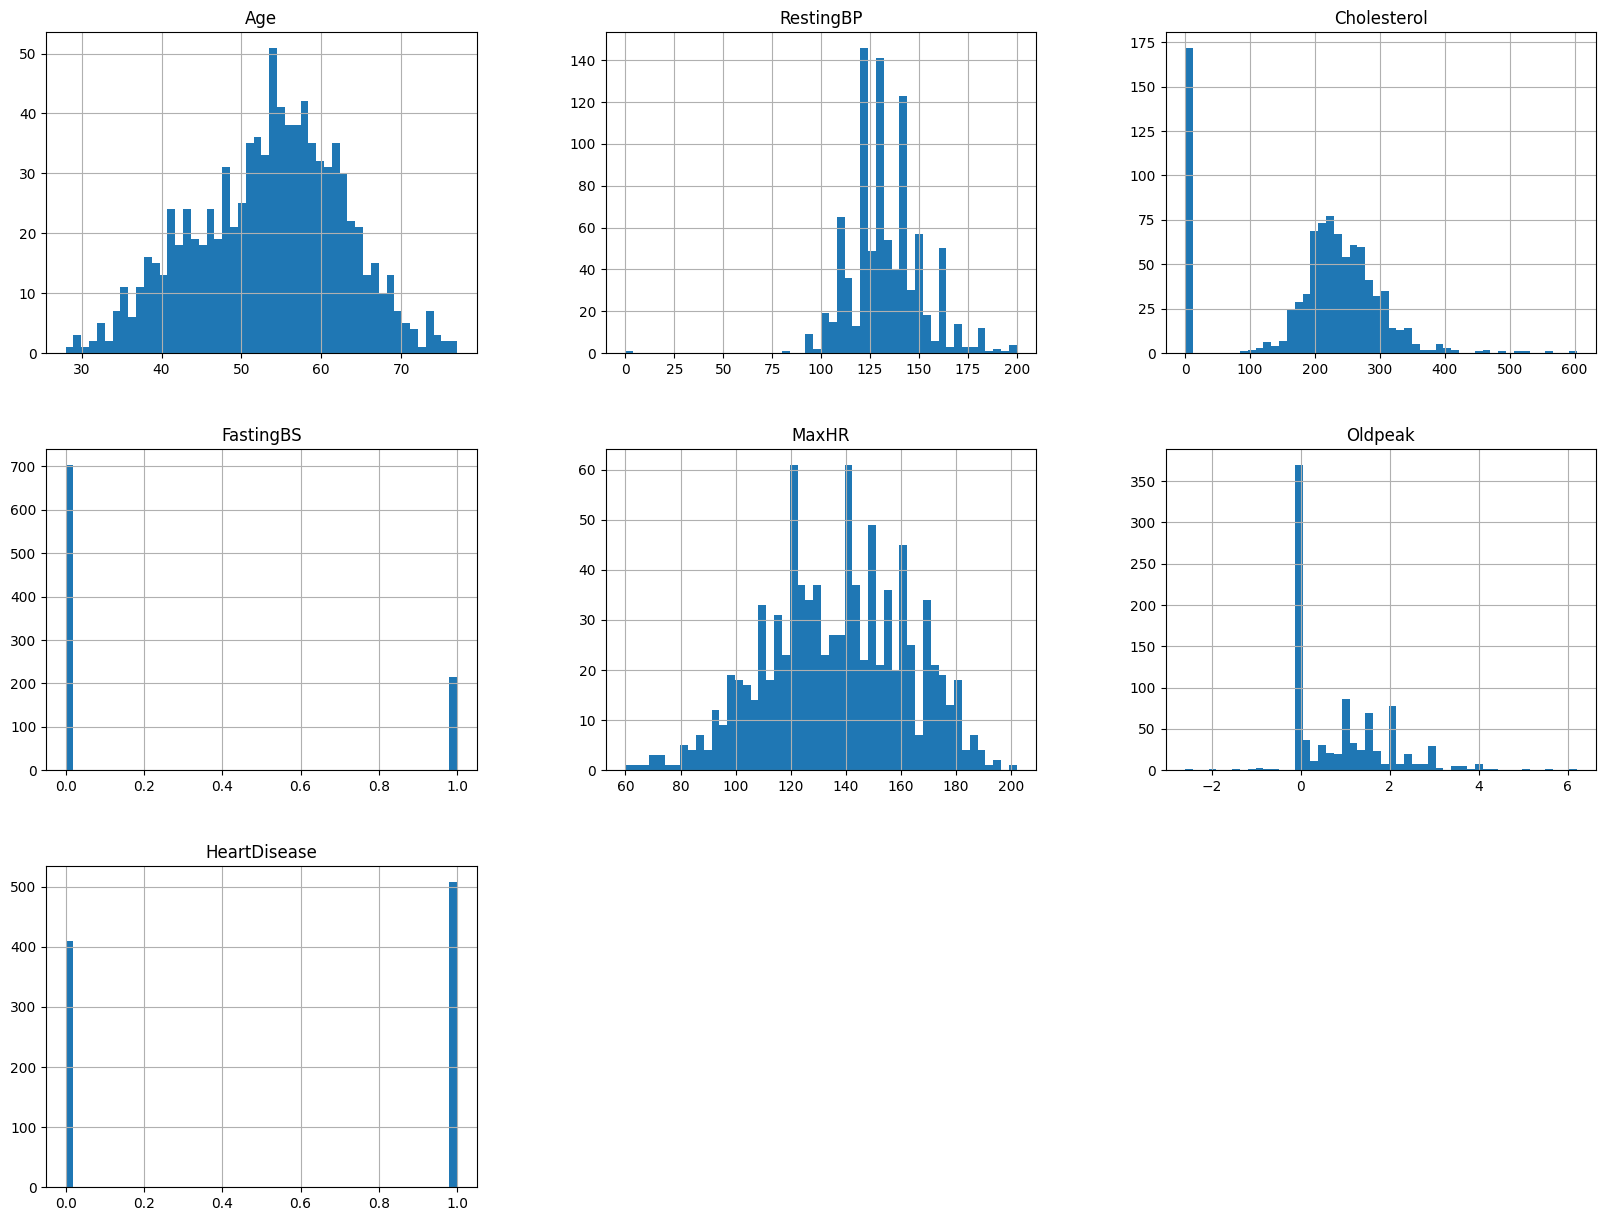

In [6]:
data.hist(bins=50, figsize=(20,15))
plt.show()

#### Dealing with Missing Values

Terdapat 2 kolom yang perlu diselidiki:
- Kolesterol adalah zat lemak yang ditemukan dalam tubuh manusia dan memiliki nilai yang berbeda-beda. Tidak mungkin bagi seseorang untuk memiliki nilai kolesterol yang tepat 0 dalam kondisi normal.

- Nilai RestingBP seseorang tidak mungkin bernilai 0 karena tekanan darah minimal yang dibutuhkan untuk memompa darah ke seluruh tubuh adalah 60 mmHg. Namun, nilai RestingBP seseorang bisa bernilai sangat rendah dan di bawah normal seperti 90/60 mmHg atau bahkan lebih rendah.

In [7]:
Cholesterol = (data.Cholesterol == 0).sum()
RestingBP = (data.RestingBP == 0).sum()

print("Nilai 0 di kolom Cholesterol ada: ", Cholesterol)
print("Nilai 0 di kolom RestingBP ada: ", RestingBP)

Nilai 0 di kolom Cholesterol ada:  172
Nilai 0 di kolom RestingBP ada:  1


Terdapat 3 teknik yang populer untuk mengatasi hal ini yaitu Dropping, Imputation, dan Interpolation. Mengingat Jumlah dataset kita yang tidak terlalu besar, kita tidak boleh menggunakan teknik Dropping. Ini dikarenakan menghapus data akan membuat kita kehilangan informasi yang mungkin berkontribusi pada analisis atau model yang akan dibangun, terlebih lagi terdapat 172 baris yang bernilai 0 pada kolom kolesterol. Sedangkan Interpolation lebih dikhusukan untuk dataset bertipe time series karena Interpolation memiliki keuntungan dalam menjaga kontinuitas data. Oleh karena itu imputation adalah solusi yang tepat.

Dengan menggunakan metode imputasi, Kita dapat mencoba menggantikan nilai-nilai kolesterol yang bernilai 0 dengan nilai yang diestimasi berdasarkan data yang ada. Beberapa metode imputasi yang bisa kita pertimbangkan yaitu Imputasi Berdasarkan Mean, Median, atau Modus, Imputasi Regresi, dan Imputasi dengan KNN, dan Imputatsi Multiple Imputation. Begitu juga dengan nilai 0 pada RestingBP. Sebenarnya kita bisa melakukan dropping karena hanya terdapat 1 baris yang bernilai 0 pada kolom RestingBP. Namun kita tetap akan menggunakan teknik yang sama yaitu Imputation.

In [8]:
from sklearn.impute import KNNImputer
subset_data = data[['Cholesterol']]
subset_data['Cholesterol'].replace(0, np.nan, inplace=True)
imputer = KNNImputer(n_neighbors=3)
after_impute = imputer.fit_transform(subset_data)
data['Cholesterol'] = after_impute

<ipython-input-8-c248e592cfaf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['Cholesterol'].replace(0, np.nan, inplace=True)


In [9]:
from sklearn.impute import KNNImputer
subset_data = data[['RestingBP']]
subset_data['RestingBP'].replace(0, np.nan, inplace=True)
imputer = KNNImputer(n_neighbors=3)
after_impute = imputer.fit_transform(subset_data)
data['RestingBP'] = after_impute

<ipython-input-9-1f491af9f8ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['RestingBP'].replace(0, np.nan, inplace=True)


In [10]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.540894,244.635389,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.989932,53.318029,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


- heart_df['Cholesterol'].replace(0, np.nan, inplace=True): Di sini, saya mengganti semua nilai 0 dalam kolom "Cholesterol" dengan nilai NaN. Ini adalah langkah yang baik karena nilai 0 dalam konteks kolesterol tidak masuk akal dan lebih baik dianggap sebagai nilai yang hilang.

- imputer = KNNImputer(n_neighbors=3): saya membuat objek KNNImputer dari pustaka sklearn.impute dengan menentukan n_neighbors=3. Ini berarti saya akan menggunakan 3 tetangga terdekat untuk mengimputasi nilai yang hilang.

- after_impute = imputer.fit_transform(heart_df): saya menggunakan metode fit_transform pada objek imputer untuk mengisi nilai-nilai yang hilang dalam DataFrame heart_df menggunakan algoritma K-Nearest Neighbors.

- heart_df = pd.DataFrame(after_impute, columns=heart_df.columns): Setelah imputasi selesai, saya mengganti DataFrame asli heart_df dengan hasil imputasi yang telah diubah tipe data menjadi DataFrame lagi.

In [11]:
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak','HeartDisease']

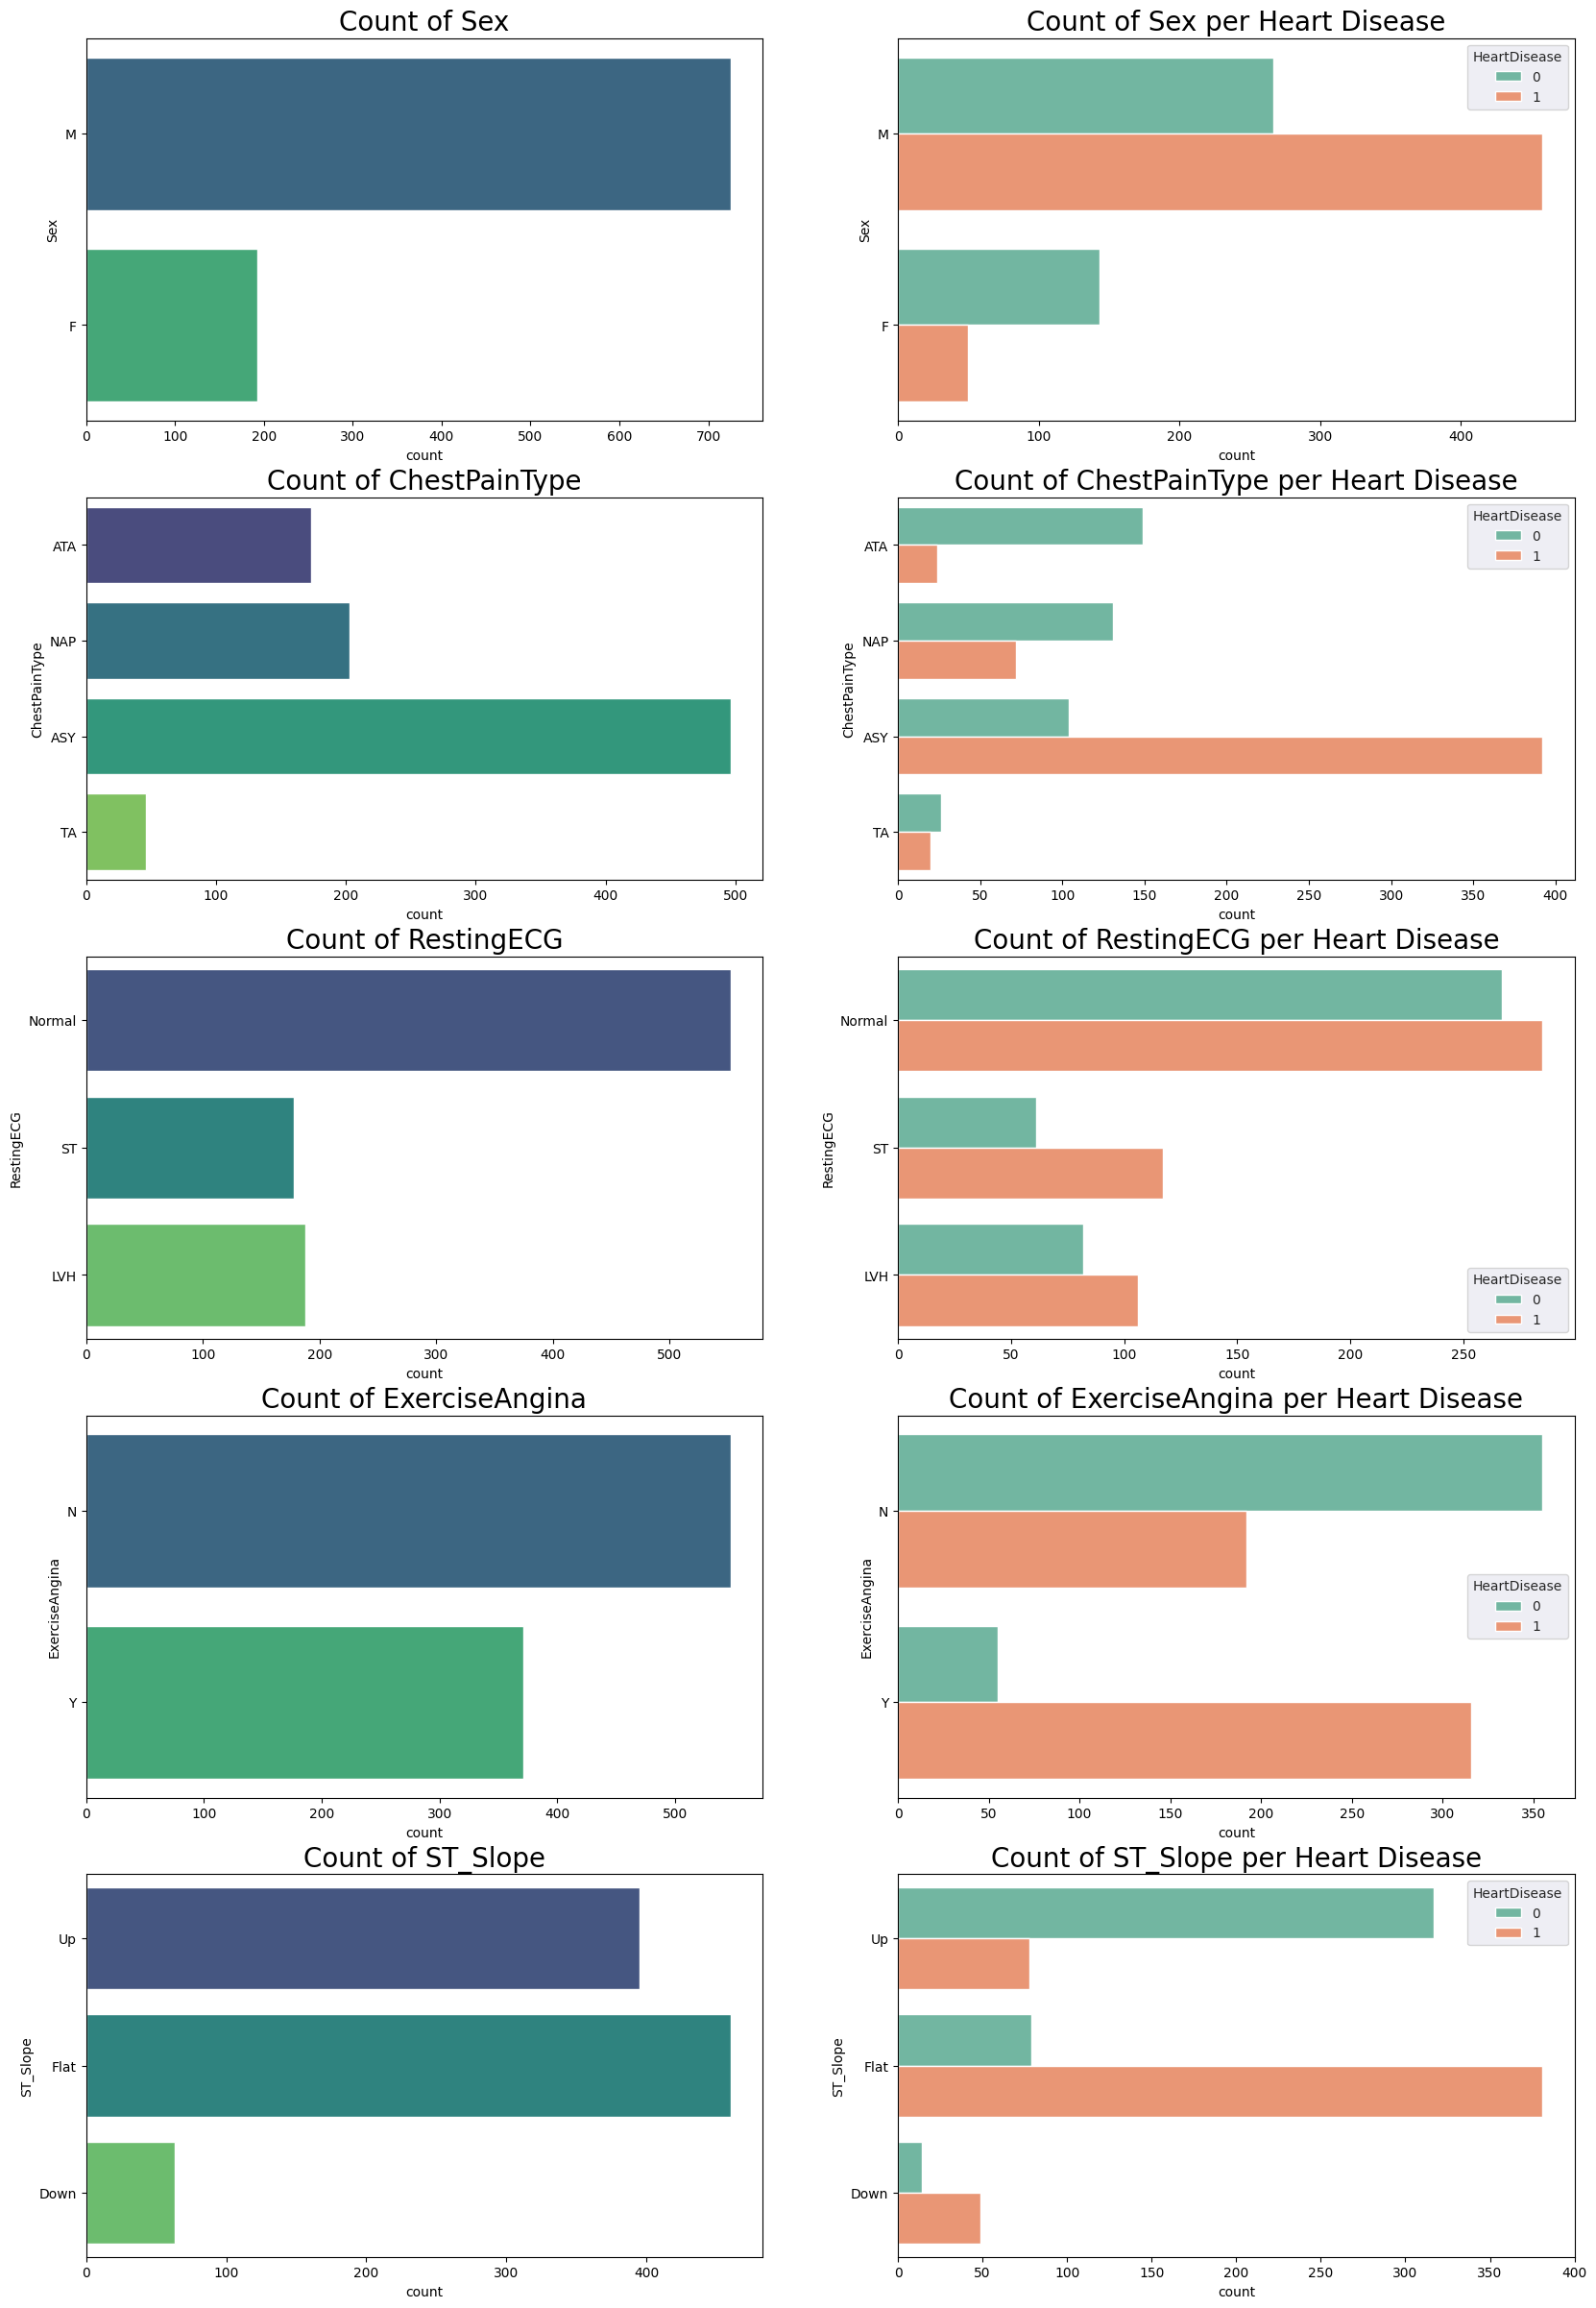

In [12]:
fig, axes = plt.subplots(5, 2, figsize=(20, 30))
sns.set_style('darkgrid')
idx = 0
for col in categorical_features:
    if idx < 5:
        sns.countplot(data=data, y=col, palette='viridis', orient='h',
                      ax=axes[idx][0]).set_title(f'Count of {col}', fontsize=20)

    if idx < 5:
        sns.countplot(data=data, y=col, palette='Set2', orient='h', hue='HeartDisease',
                      ax=axes[idx][1]).set_title(f'Count of {col} per Heart Disease', fontsize=20)

    idx += 1
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

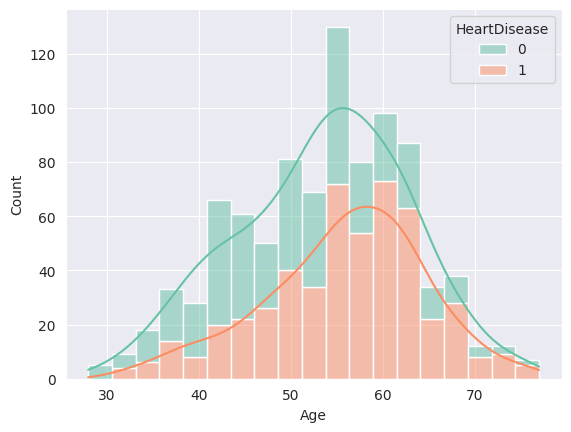

In [13]:
sns.histplot(data=data, x="Age", hue="HeartDisease", multiple="stack",palette="Set2",kde=True)

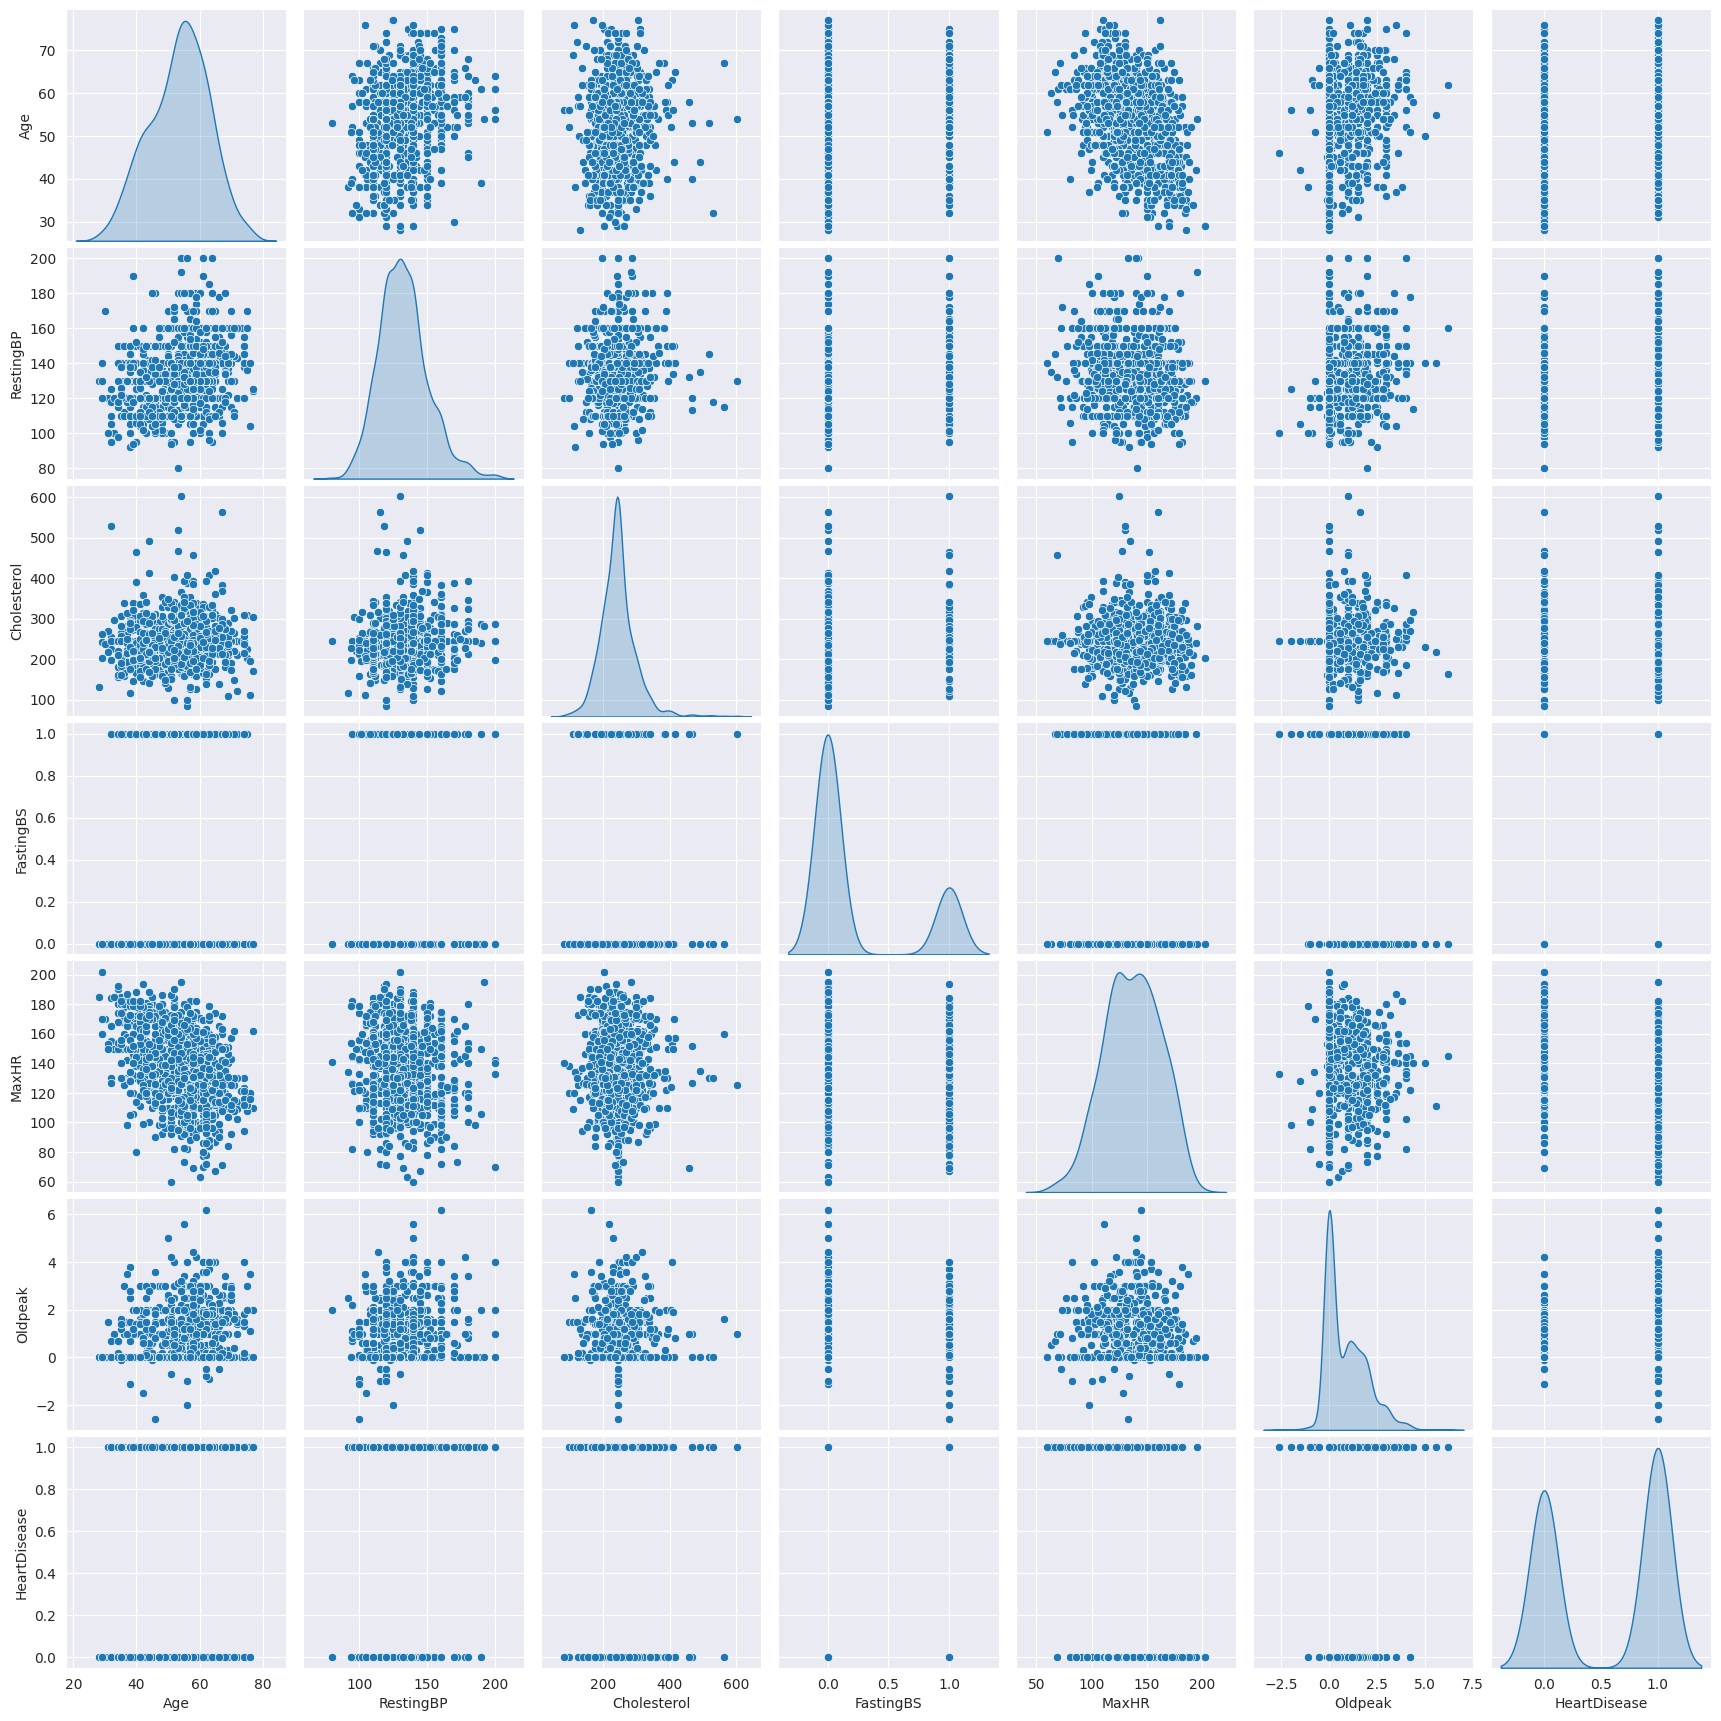

In [14]:
sns.pairplot(data, diag_kind = 'kde')

Untuk menganalisis hubungan antara variabel kategorikal dan variabel numerik atau target, lebih baik menggunakan teknik visualisasi yang sesuai. Box plot, violin plot, atau plot lainnya yang sesuai dapat memberikan wawasan tentang hubungan antara variabel kategorikal dan variabel numerik atau target dalam bentuk yang mudah dipahami.

Text(0.5, 1.0, 'Cholesterol vs HeartDisease')

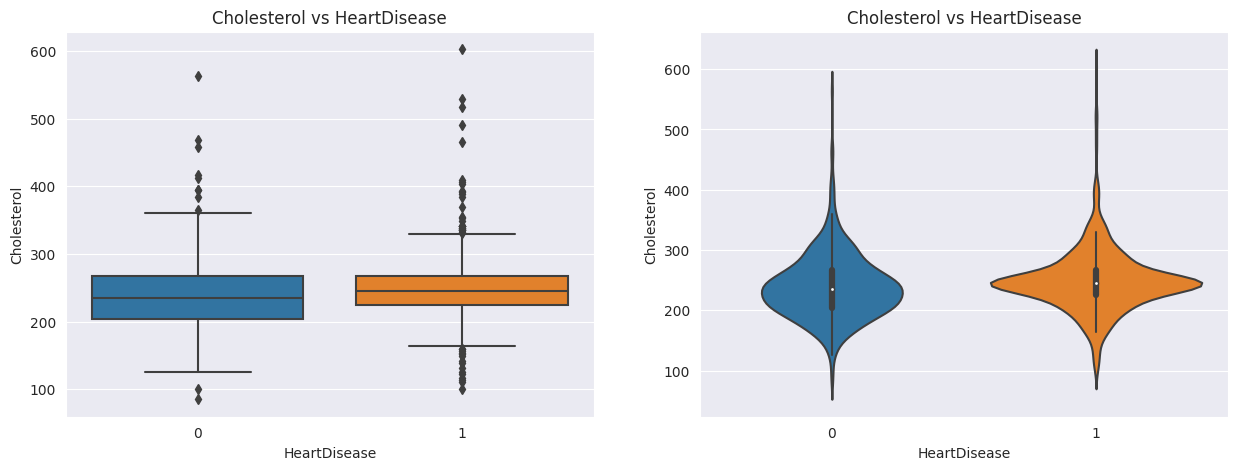

In [15]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='HeartDisease', y='Cholesterol', data=data, ax=ax[0]).set_title('Cholesterol vs HeartDisease')
sns.violinplot(x='HeartDisease', y='Cholesterol', data=data, ax=ax[1]).set_title('Cholesterol vs HeartDisease')

Violin plot ini menunjukkan semakin tinggi nilai kolesterol, semakin tinggi juga risiko seseorang mengalami penyakit jantung. Ini berarti individu dengan kolesterol yang lebih tinggi cenderung memiliki kemungkinan lebih besar untuk mengalami penyakit jantung. Namun untuk melihat seberapa besar relasi positif antara kolestrol dengan penyakit jantung ini, kita akan memvisualiasikannya dengan Correlation Matrix.

Text(0.5, 1.0, 'MaxHR vs HeartDisease')

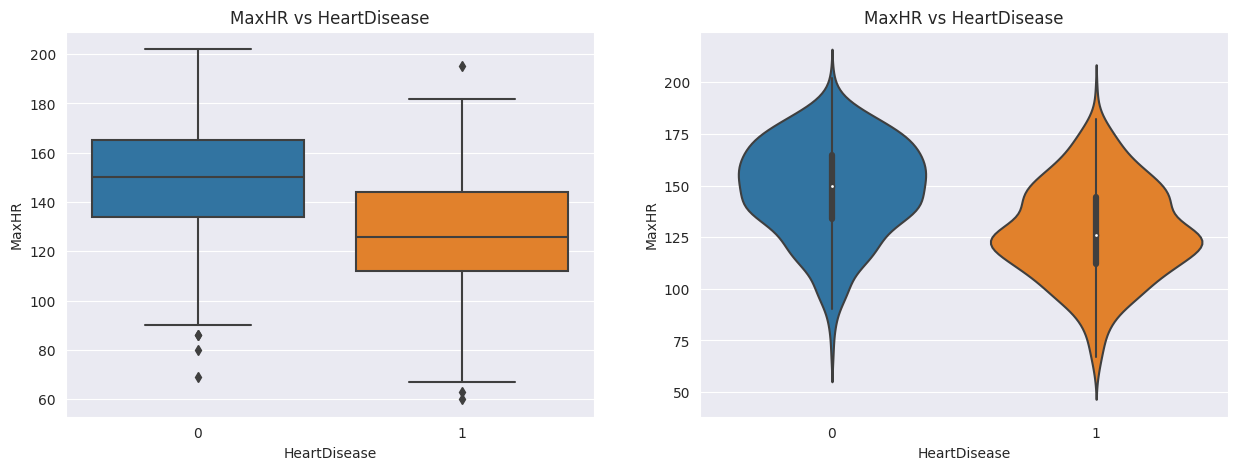

In [16]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='HeartDisease', y='MaxHR', data=data, ax=ax[0]).set_title('MaxHR vs HeartDisease')
sns.violinplot(x='HeartDisease', y='MaxHR', data=data, ax=ax[1]).set_title('MaxHR vs HeartDisease')

Violin plot ini menunjukkan MaxHR(Maximum Heart Rate) berkorelasi negatif dengan HeartDisease. Ini berarti bahwa semakin tinggi nilai MaxHR, semakin rendah kemungkinan seseorang mengalami penyakit jantung. Dalam konteks ini, ada kecenderungan bahwa orang dengan detak jantung maksimal yang lebih tinggi cenderung memiliki risiko lebih rendah untuk mengalami penyakit jantung. Namun untuk melihat seberapa besar relasi negatif antara MaxHR dengan penyakit jantung ini, kita akan memvisualiasikannya dengan Correlation Matrix.

Text(0.5, 1.0, 'Correlation Matrix For Numeric Feature ')

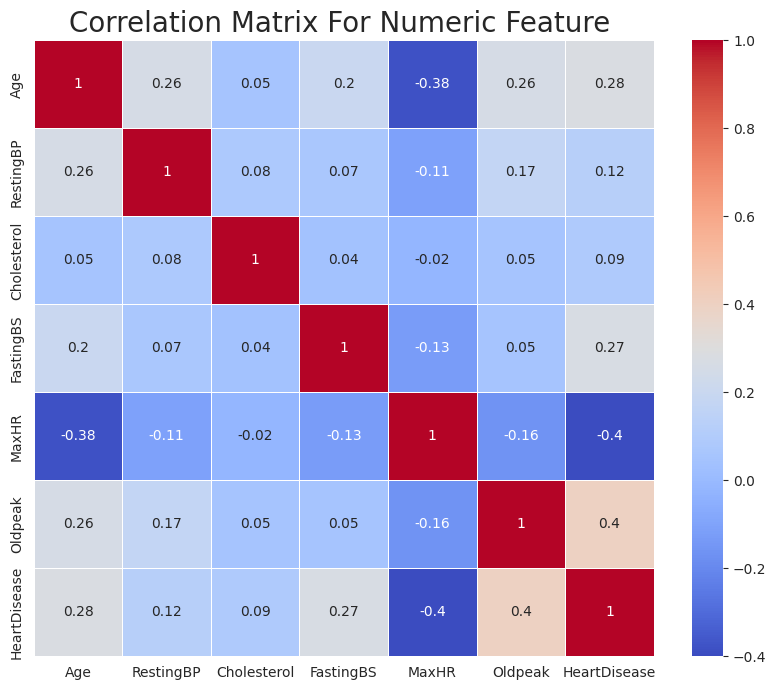

In [17]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_features].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix For Numeric Feature ", size=20)

## Data Preparation

Jika beberapa fitur tidak menunjukkan korelasi yang tinggi terhadap target atau tidak ada variasi yang signifikan dalam arah tertentu, maka penerapan PCA mungkin tidak akan memberikan manfaat yang signifikan. PCA lebih berguna saat kita memiliki fitur-fitur yang memiliki variasi tinggi dan korelasi yang tinggi sehingga dapat mengidentifikasi arah utama dari variasi dalam data. Maka dari itu kita bisa langsung menuju ke tahap selanjutnya.

In [18]:
data = pd.concat([data, pd.get_dummies(data['Sex'], prefix='Sex')],axis=1)
data = pd.concat([data, pd.get_dummies(data['ChestPainType'], prefix='ChestPainType')],axis=1)
data = pd.concat([data, pd.get_dummies(data['RestingECG'], prefix='RestingECG')],axis=1)
data = pd.concat([data, pd.get_dummies(data['ExerciseAngina'], prefix='ExerciseAngina')],axis=1)
data = pd.concat([data, pd.get_dummies(data['ST_Slope'], prefix='ST_Slope')],axis=1)
data.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'], axis=1, inplace=True)
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160.0,180.0,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130.0,283.0,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138.0,214.0,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150.0,195.0,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


#### Export Dataset

In [19]:
data.to_csv('heartClean.csv', index=False)